<a href="https://colab.research.google.com/github/mca2309/OCR-using-OpenCV-and-Tensorflow-with-GUI/blob/main/OCR_on_3D_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Downloading and extracting the CIFAKE dataset from kaggle
from google.colab import drive
drive.mount('/content/drive')

!pip install kaggle

import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

!kaggle datasets download -d daavoo/3d-mnist

import zipfile

file_path = '/content/3d-mnist.zip'

!mkdir 3d-mnist

with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/3d-mnist')

Mounted at /content/drive
 92% 140M/153M [00:02<00:00, 73.4MB/s]
100% 153M/153M [00:03<00:00, 51.9MB/s]


In [72]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import h5py

In [73]:
# Load the dataset
f = h5py.File("/content/3d-mnist/full_dataset_vectors.h5", "r")
trainX = f["X_train"][:]
trainY = f["y_train"][:]
testX = f["X_test"][:]
testY = f["y_test"][:]

In [74]:
# Reshape dataset to have a single channel and add a depth dimension
trainX = trainX.reshape((trainX.shape[0], 16, 16, 16, 1))
testX = testX.reshape((testX.shape[0], 16, 16, 16, 1))

In [75]:
# One-hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [76]:
# Scale pixels
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0

In [77]:
# Create a CNN
model = Sequential()
model.add(Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(16, 16, 16, 1)))
model.add(MaxPooling3D((2, 2, 2)))
model.add(Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling3D((2, 2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [78]:
# Compile model
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [79]:
# Fit the model
history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY))
# save our model
model.save('mnist_3D_cnn.h5')

Epoch 1/10
313/313 [==============================] - 4s 8ms/step - loss: 2.2913 - accuracy: 0.1302 - val_loss: 2.1881 - val_accuracy: 0.2260
Epoch 2/10
313/313 [==============================] - 2s 7ms/step - loss: 2.0581 - accuracy: 0.2663 - val_loss: 1.7625 - val_accuracy: 0.3810
Epoch 3/10
313/313 [==============================] - 2s 7ms/step - loss: 1.7626 - accuracy: 0.3933 - val_loss: 1.5599 - val_accuracy: 0.4585
Epoch 4/10
313/313 [==============================] - 3s 8ms/step - loss: 1.6325 - accuracy: 0.4408 - val_loss: 1.4795 - val_accuracy: 0.4905
Epoch 5/10
313/313 [==============================] - 2s 8ms/step - loss: 1.5556 - accuracy: 0.4652 - val_loss: 1.4348 - val_accuracy: 0.4895
Epoch 6/10
313/313 [==============================] - 2s 6ms/step - loss: 1.4953 - accuracy: 0.4833 - val_loss: 1.3825 - val_accuracy: 0.5100
Epoch 7/10
313/313 [==============================] - 2s 7ms/step - loss: 1.4518 - accuracy: 0.4981 - val_loss: 1.3793 - val_accuracy: 0.5145
Epoch 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [80]:
# Evaluate the model
loss, accuracy = model.evaluate(testX, testY)
print(f'Test accuracy: {accuracy}')

63/63 [==============================] - 0s 5ms/step - loss: 1.3000 - accuracy: 0.5460
Test accuracy: 0.5460000038146973


In [81]:
# Predict the test set
y_predicted = model.predict(testX)
y_predicted = np.argmax(y_predicted, axis=1)

63/63 [==============================] - 0s 2ms/step


In [82]:
# Print classification report
print(classification_report(np.argmax(testY, axis=1), y_predicted))

              precision    recall  f1-score   support

           0       0.53      0.89      0.67       170
           1       0.90      0.86      0.88       252
           2       0.75      0.46      0.57       232
           3       0.52      0.44      0.48       214
           4       0.44      0.39      0.41       220
           5       0.43      0.43      0.43       174
           6       0.58      0.41      0.48       174
           7       0.74      0.53      0.62       198
           8       0.33      0.62      0.43       178
           9       0.42      0.41      0.41       188

    accuracy                           0.55      2000
   macro avg       0.56      0.54      0.54      2000
weighted avg       0.58      0.55      0.55      2000



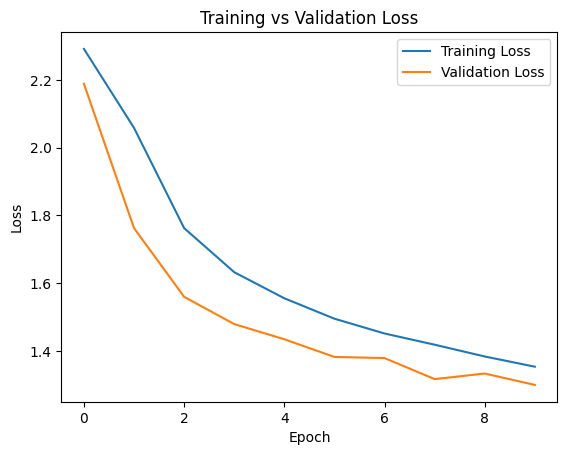

In [83]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

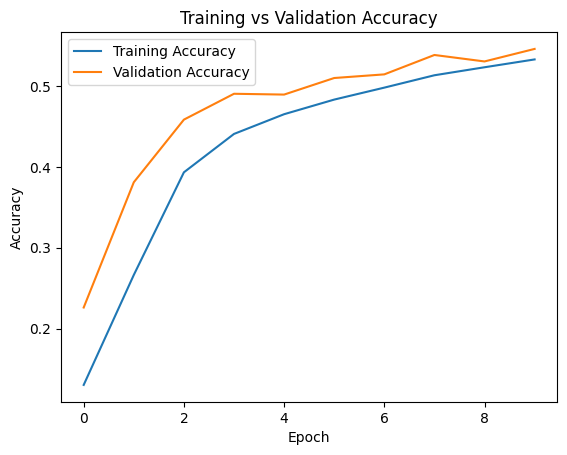

In [84]:
# Plot the training and testing accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

In [85]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(np.argmax(testY, axis=1), y_predicted)

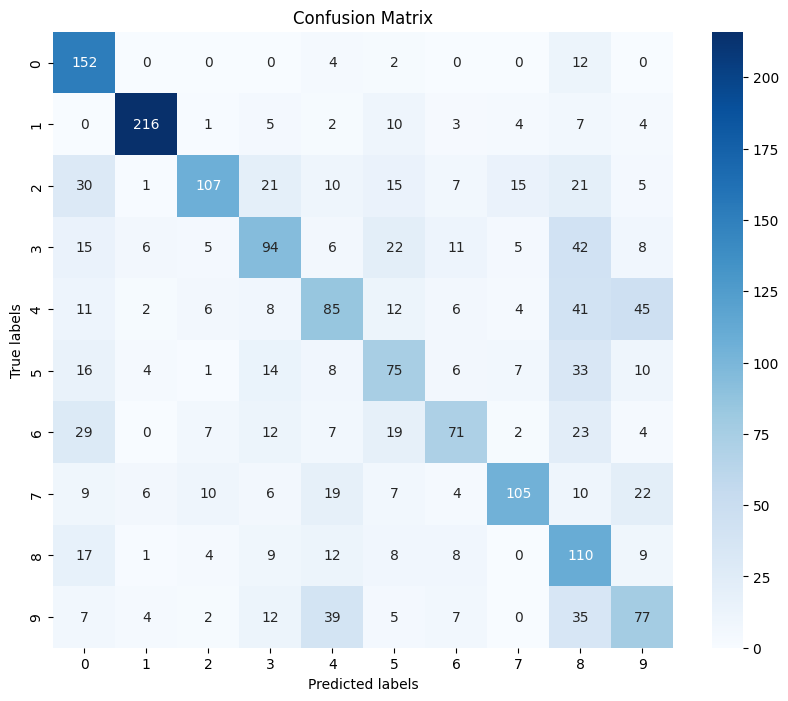

In [86]:
# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()